In [ ]:
%load_ext autoreload

In [26]:
import numpy as np
import pandas as pd
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import sys, os
from numpy import savez_compressed


ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f

module_path = os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)
print("ROOT", ROOT_PATH)


%autoreload
import wt_data
import ff_transform
import explore_fft_time_data
import build_dataset
import envelope


ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [18]:
intervals_vibrations_wt2, intervals_times_wt2, df_intervals_data_wt02, intervals_peak_arrays_wt02 = build_dataset.load_wt_high_freq_analysis("WTG02",'GbxHssRr;0,0102;m/s2')


Loading WTG02...
Loaded WTG02


In [19]:
# Saving vibrations
savez_compressed('../../sensor_data/intervals_vibrations_wt02.npz', intervals_vibrations_wt2)

# Saving timestamps
savez_compressed('../../sensor_data/intervals_times_wt02.npz', intervals_times_wt2)

# Saving operating data
df_intervals_data_wt02.to_csv('../../sensor_data/df_intervals_data_wt02.csv.gz', compression='gzip')

del intervals_vibrations_wt2, intervals_times_wt2, df_intervals_data_wt02


In [21]:
savez_compressed('../../sensor_data/intervals_peak_arrays_wt02.npz', intervals_peak_arrays_wt02)

In [22]:
# Load compressed data
from numpy import load
df_intervals_data_wt02 = pd.read_csv('../../sensor_data/df_intervals_data_wt02.csv.gz', compression='gzip')
vib_signal_wt2 = load('../../sensor_data/intervals_vibrations_wt02.npz')
times_wt2 = load('../../sensor_data/intervals_times_wt02.npz')
vib_signal_wt2 = vib_signal_wt2['arr_0']
times_wt2 = times_wt2['arr_0']

In [23]:
print(vib_signal_wt2.shape)
print(df_intervals_data_wt02.shape)
print(times_wt2.shape)

(419, 262144)
(419, 5)
(419, 262144)


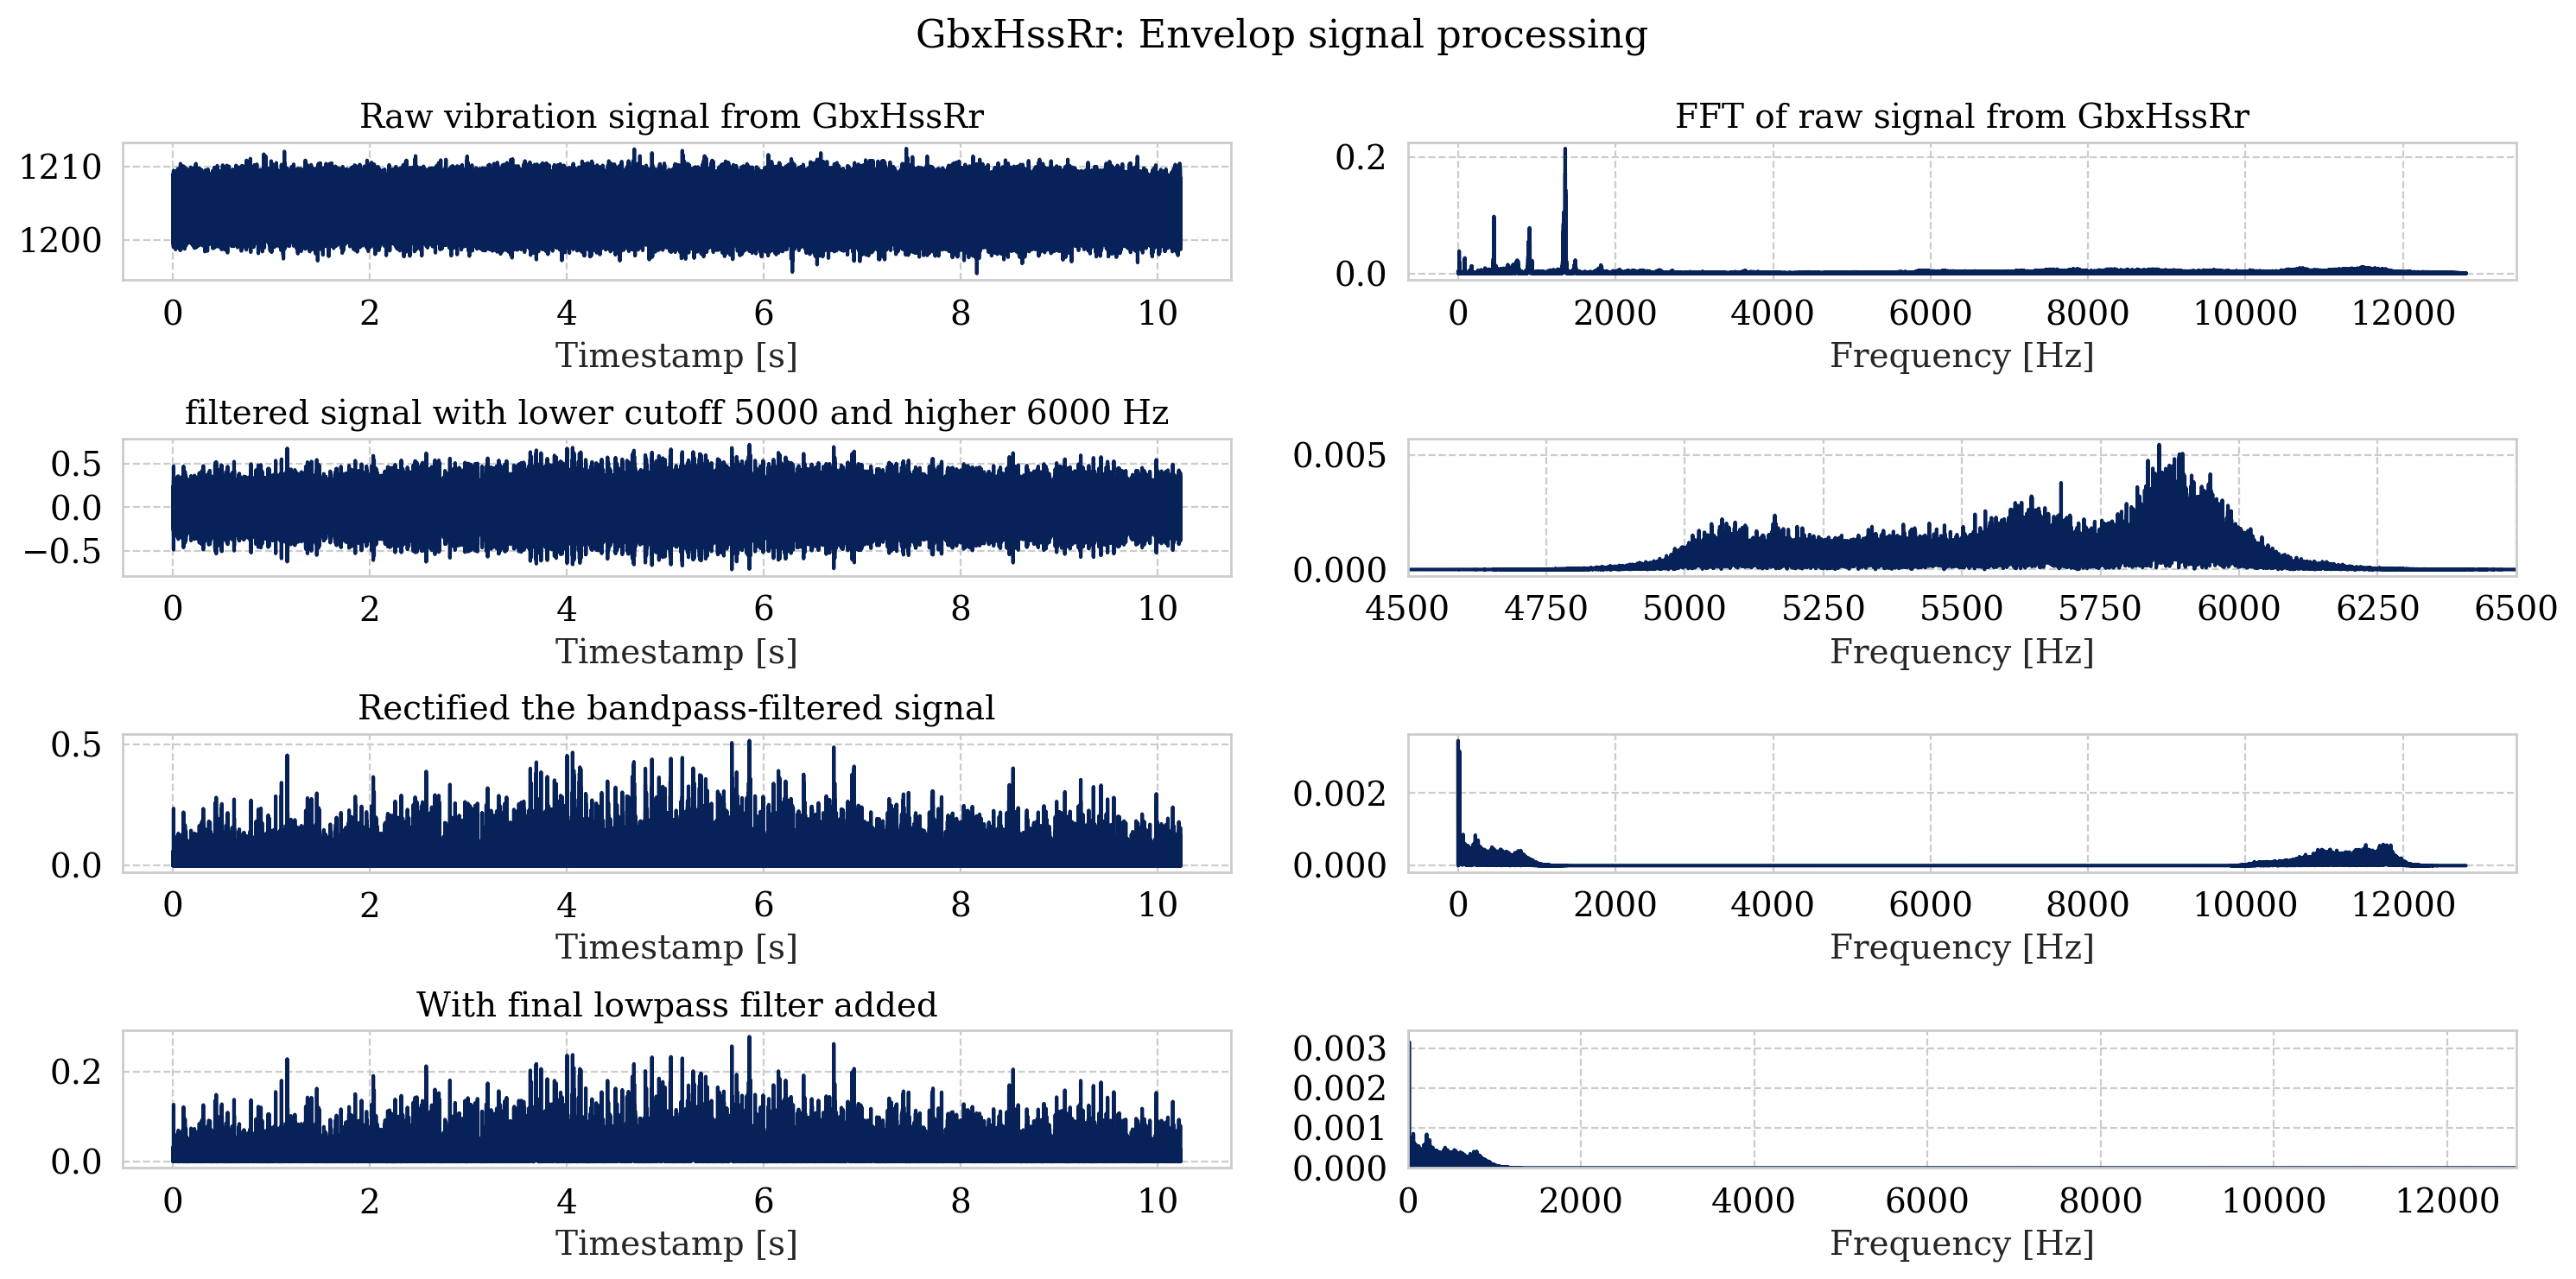

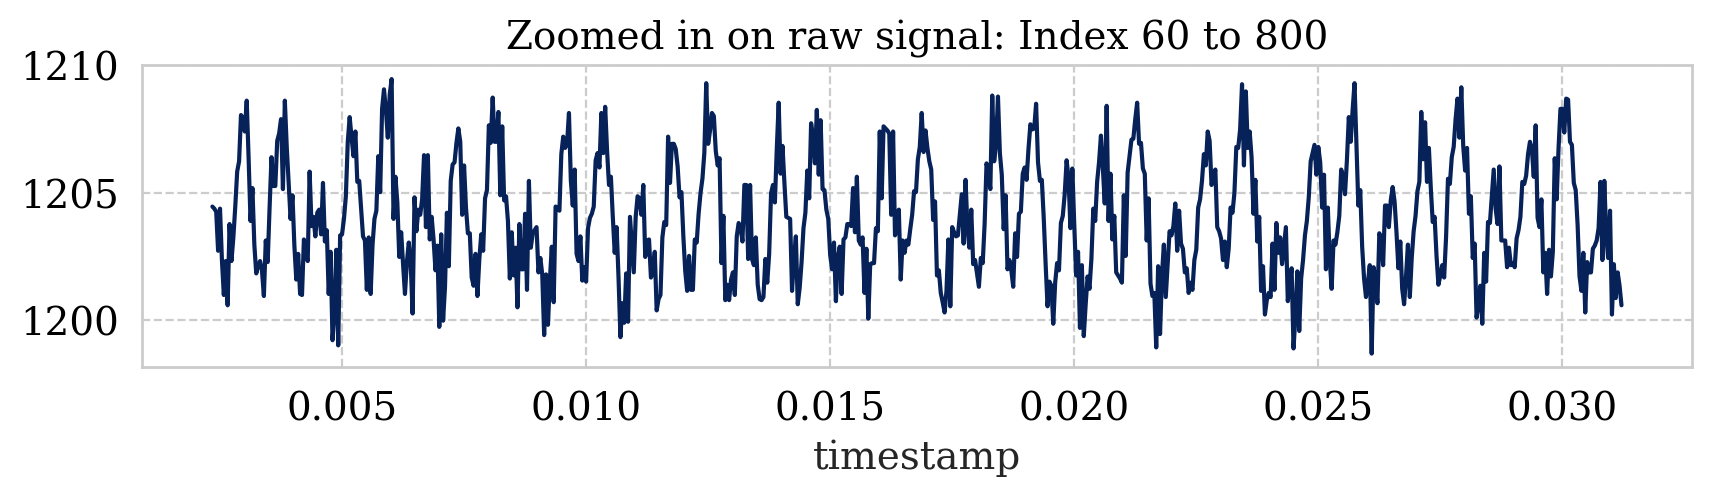

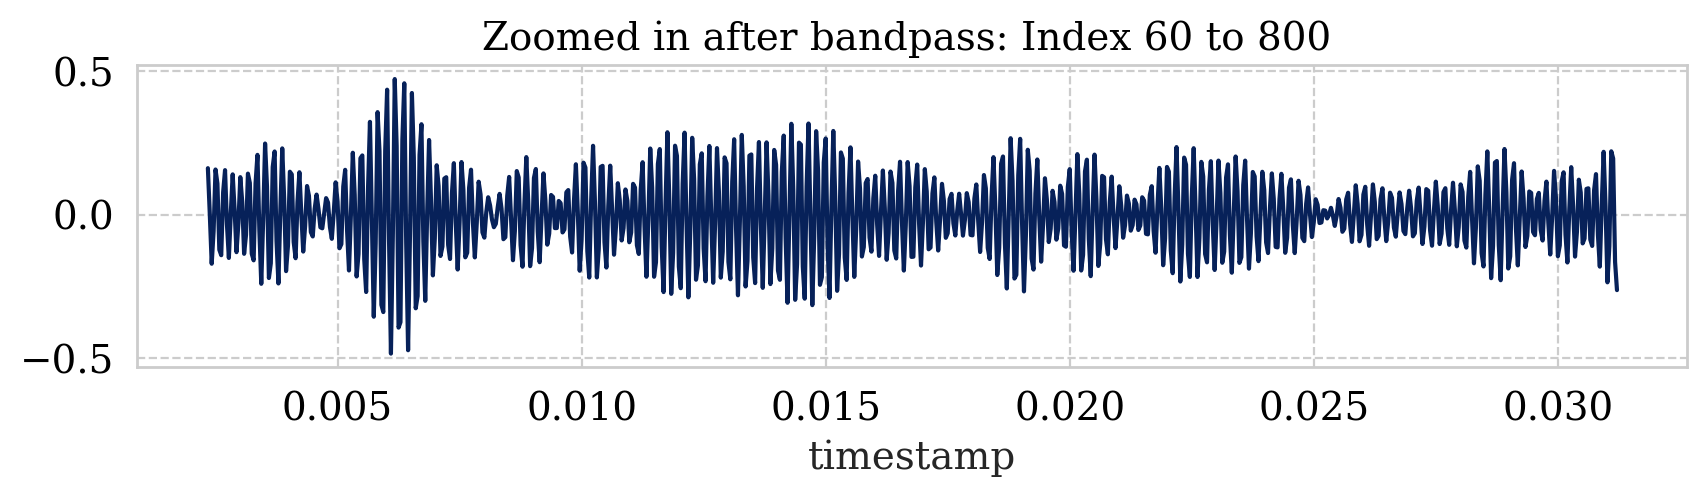

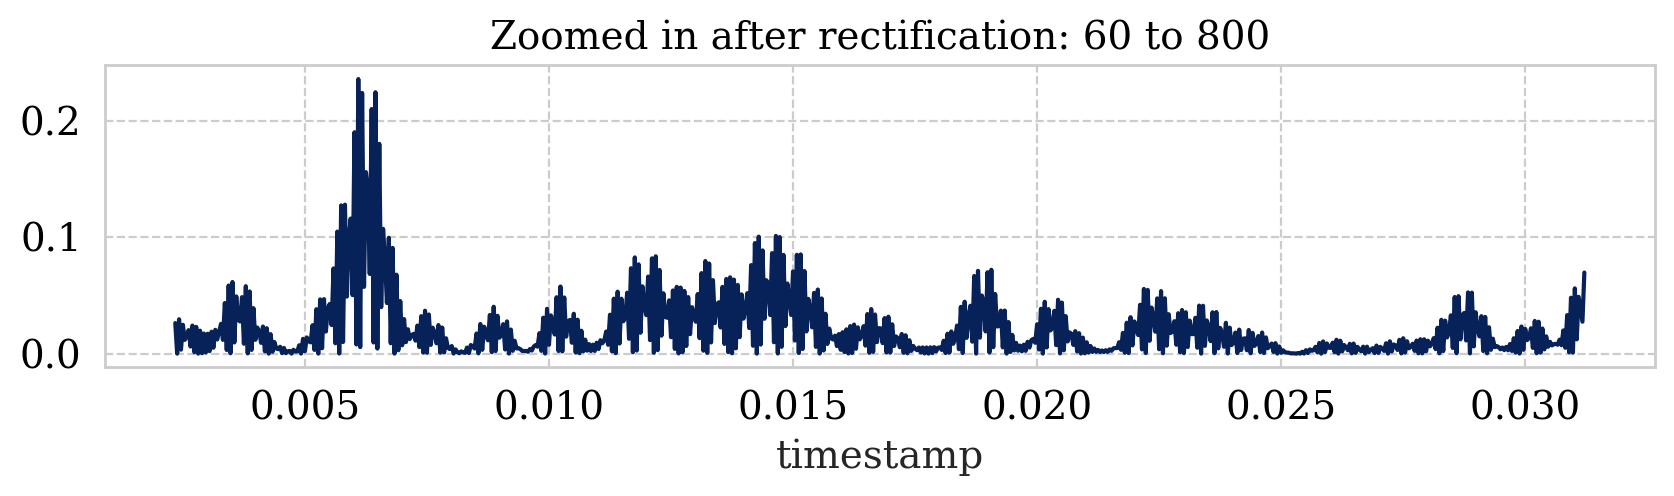

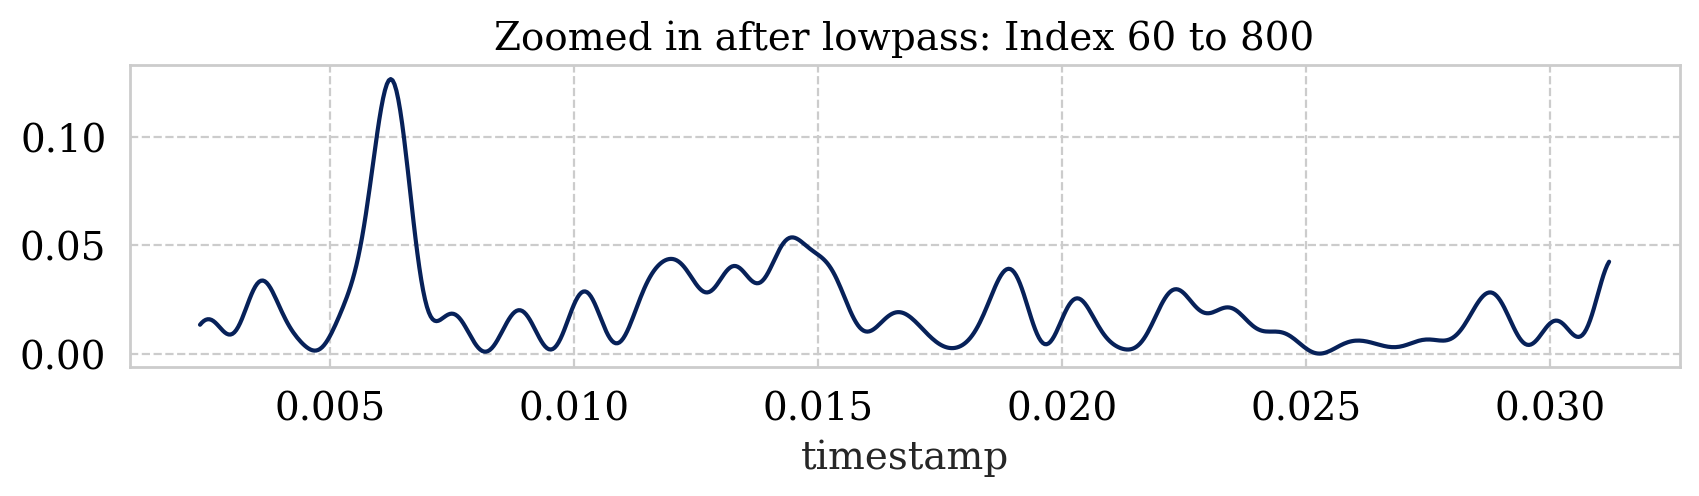

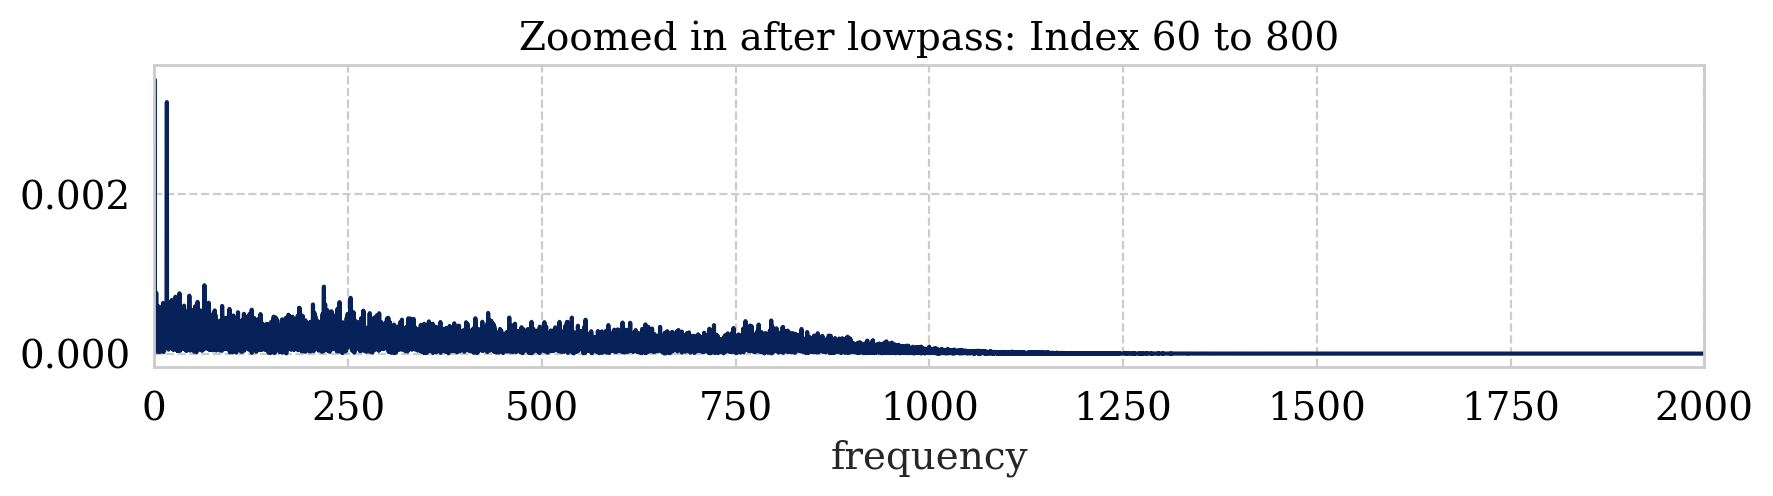

In [27]:
# Run just one:

lowcut = 5000
highcut = 6000
lowcut_final_lp = 2000

all_time_signals, all_fft_objects = envelope.perform_envelope_process(
        times_wt2[0],
        vib_signal_wt2[0],
         'GbxHssRr',
        lowcut,
        highcut,
        plot=True,
        square=True,
        plot_low=60,
        plot_high=800,
        lowcut_final_lp = lowcut_final_lp
    )
    # Do something with all_time_signals, all_fft_objects... Feature extraction/analysis of development